In [1]:
import os
print(os.listdir("/home/ankan/Desktop/5th Semester/EE698V/ass4"))

['Iris.csv', 'YourRollNo.ipynb', 'ass3_soln.ipynb', 'iris.data.csv', '.ipynb_checkpoints', 'Untitled.ipynb']


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = pd.read_csv("/home/ankan/Desktop/5th Semester/EE698V/ass4/Iris.csv")

In [4]:
print(iris.shape)

(150, 6)


In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


We see there is no null value 

# Explainatory Data Analysis (EDS)

In [8]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

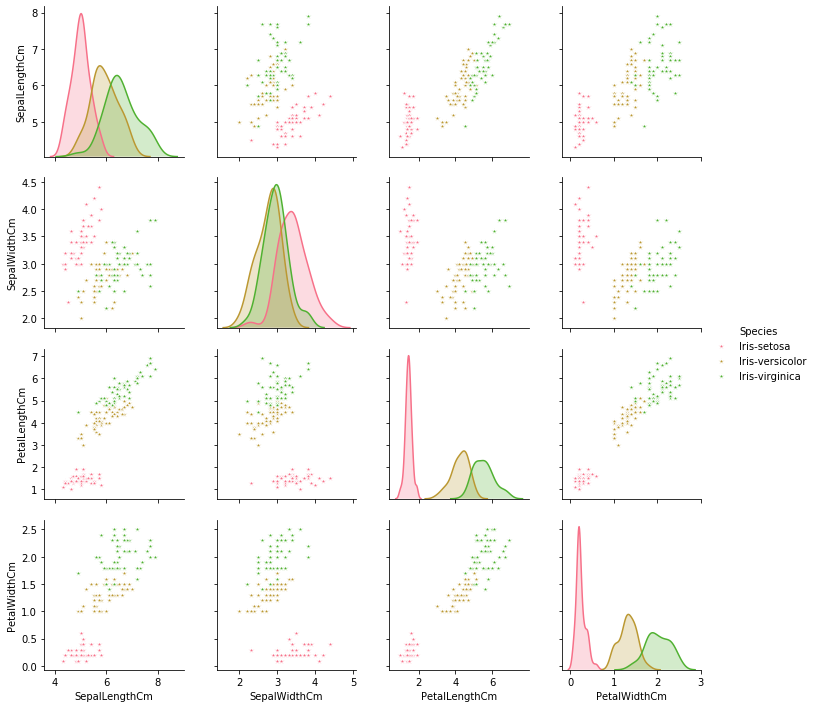

In [10]:
iris1 = iris.drop('Id',axis = 1)
g = sns.pairplot(iris1, hue = 'Species', markers = '*')
plt.show()

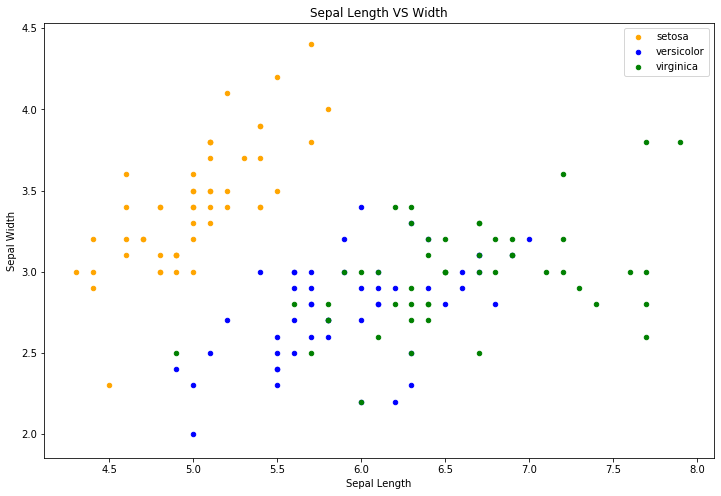

In [11]:
fig = iris1[iris1.Species=='Iris-setosa'].plot(kind = 'scatter',x = 'SepalLengthCm',y = 'SepalWidthCm',color='orange',label = 'setosa')
iris1[iris1.Species=='Iris-versicolor'].plot(kind = 'scatter',x = 'SepalLengthCm',y = 'SepalWidthCm',color='blue',label = 'versicolor',ax=fig)
iris1[iris1.Species=='Iris-virginica'].plot(kind = 'scatter',x = 'SepalLengthCm',y = 'SepalWidthCm',color='green',label = 'virginica',ax=fig)

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig = plt.gcf()
fig.set_size_inches(12,8)

plt.show()

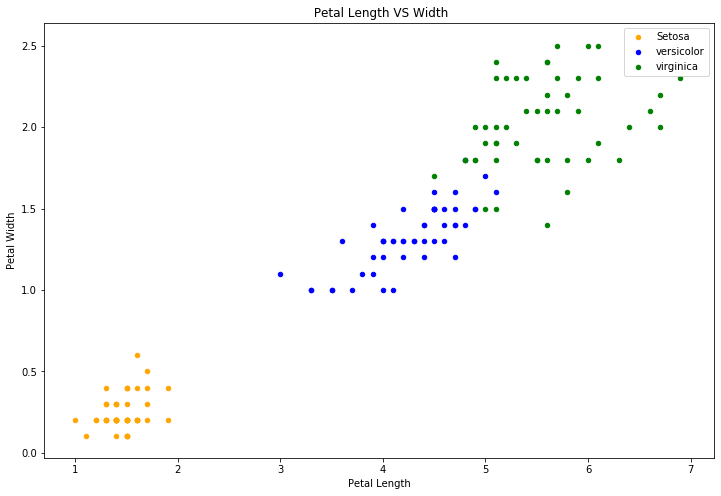

In [12]:
fig = iris1[iris1.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris1[iris1.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris1[iris1.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

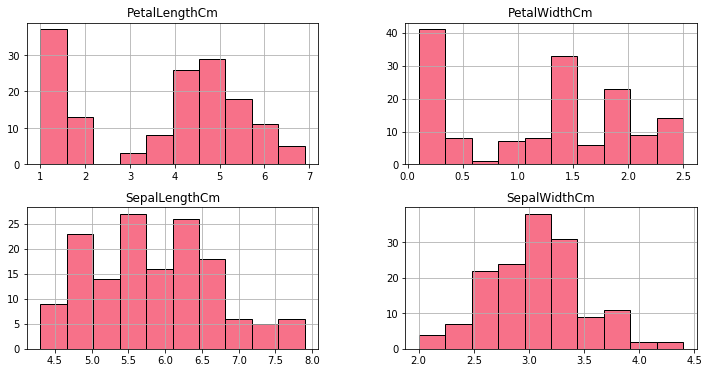

In [13]:
iris1.hist(edgecolor = 'black')
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

# Building the model

Spilit the training and test dataset

In [14]:
X = iris.drop(['Id','Species'], axis = 1)
y = iris['Species']

print(X.head())
print(X.shape)
print(y.head())
print(y.shape)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
(150, 4)
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object
(150,)


In [15]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [19]:
y_train.head()

32         Iris-setosa
52     Iris-versicolor
70     Iris-versicolor
121     Iris-virginica
144     Iris-virginica
Name: Species, dtype: object

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Logistic Regression

In [53]:
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

acc_log =  metrics.accuracy_score(y_pred,y_test)
print("The accuracy of Logistic Regression is:",acc_log)

The accuracy of Logistic Regression is: 0.8888888888888888


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Decision Tree

In [54]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

acc_dt = metrics.accuracy_score(y_pred,y_test)
print("The accuracy of Decision Tree is:",acc_dt)

The accuracy of Decision Tree is: 0.9777777777777777


Support Vector Machine

In [55]:
sv = svm.SVC()
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)

acc_sv = metrics.accuracy_score(y_pred,y_test)
print("The accuracy of SVM is:",acc_sv)

The accuracy of SVM is: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


K-Nearest Neighbours

In [56]:
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)

acc_knc = metrics.accuracy_score(y_pred,y_test)
print("The accuracy of KNC is:",acc_knc)

The accuracy of KNC is: 0.9777777777777777


In [57]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression','Decision Tree','Support Vector Machines','K-Nearest Neighbours'],
    'Score' : [acc_log, acc_dt, acc_sv, acc_knc]
})
    
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Support Vector Machines,1.000000
1,Decision Tree,0.977778
3,K-Nearest Neighbours,0.977778
0,Logistic Regression,0.888889
